In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Load the data

In [4]:
# Load the saved data into data frames
successData = pd.read_csv('ParameterSuccessData.csv', header=0, index_col=0, sep=',')
failureData = pd.read_csv('ParameterFailureData.csv', header=0, index_col=0, sep=',')

### Prepare x data

In [5]:
# Separate the parameters
gravSuccess, angleSuccess, stretchSuccess, lengthSuccess, pendMassSuccess, springSuccess = successData.values
gravFailure, angleFailure, stretchFailure, lengthFailure, pendMassFailure, springFailure = failureData.values
# Each label on the left side is now like a list of x-values 
# One list for each parameter's successes, and one for each parameter's failures
# Like [gravS1, gravS2, ...] or [gravF1, gravF2, ...]

### Create x-value array for plotting smoothly

In [6]:
successData=successData.T
failureData=failureData.T

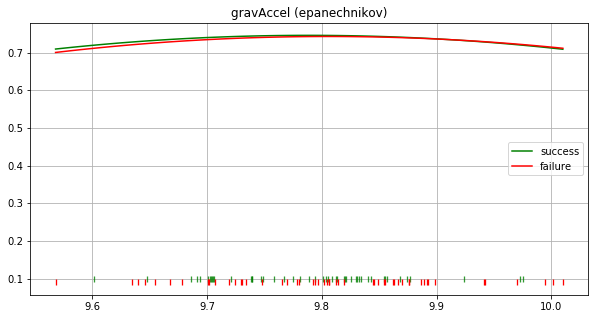

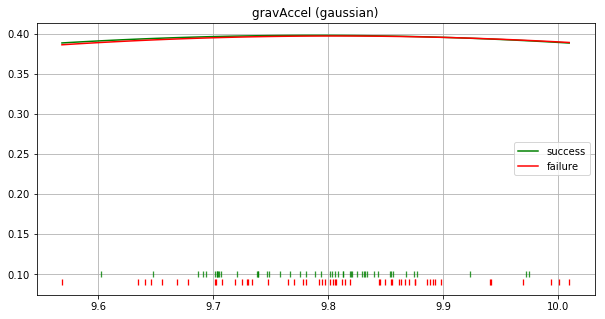

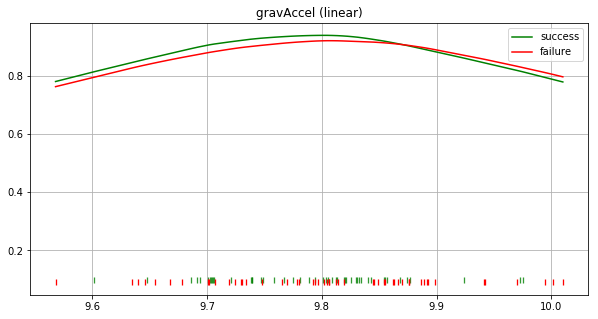

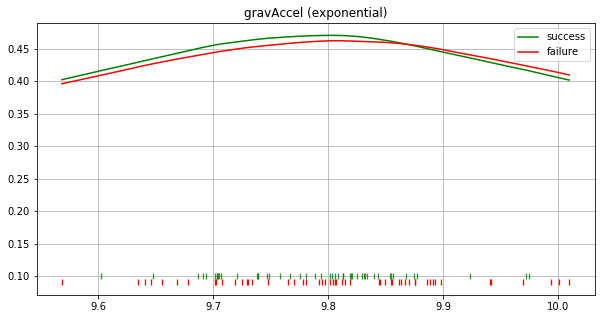

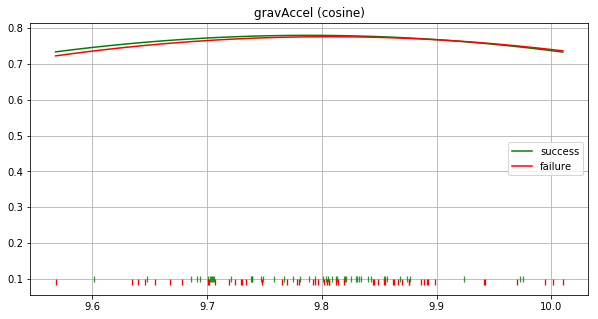

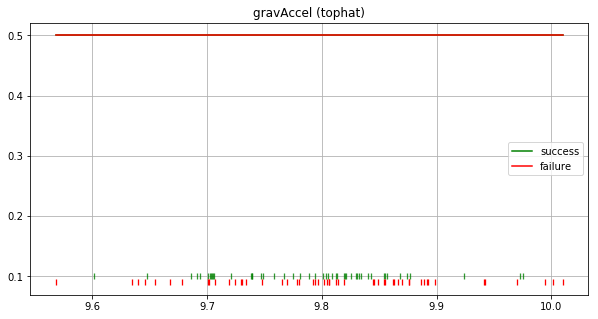

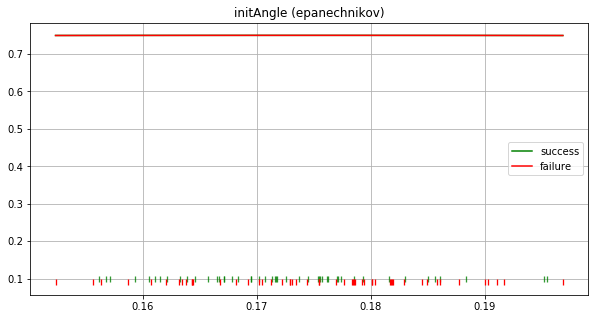

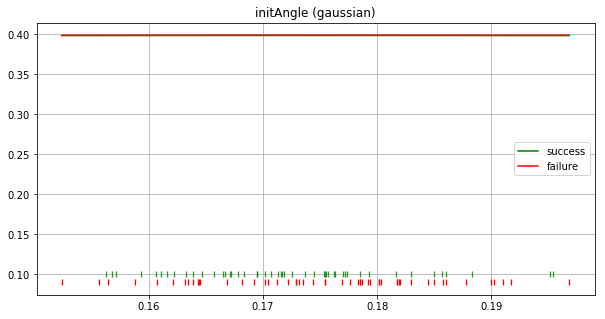

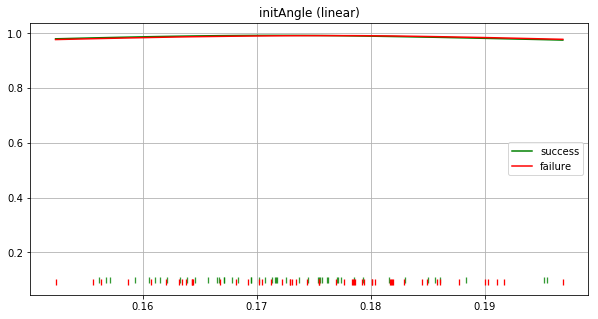

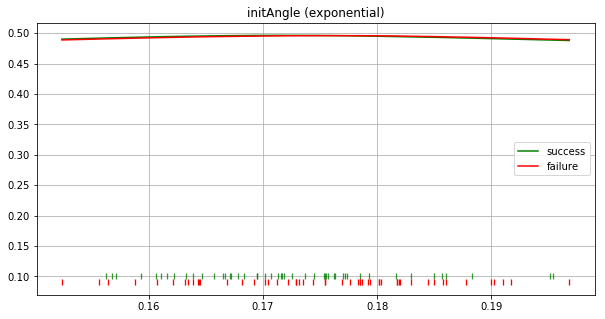

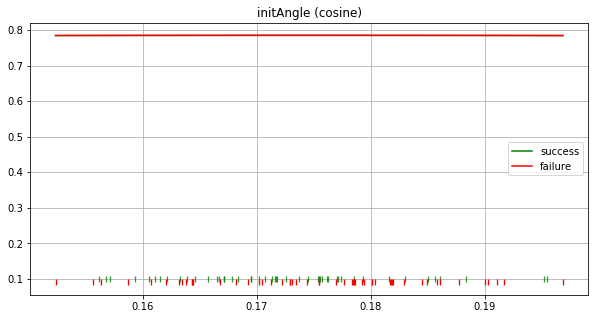

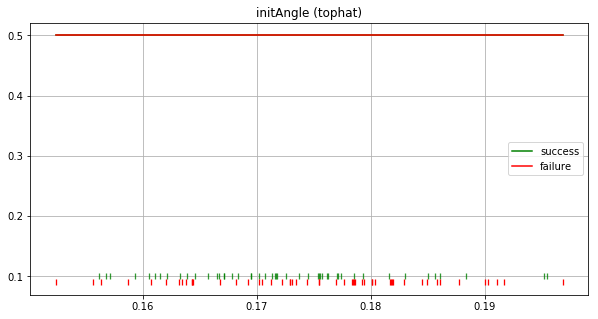

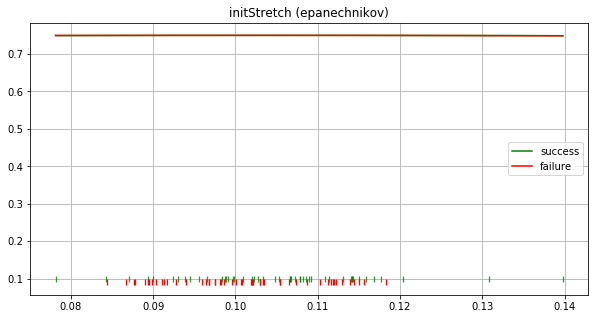

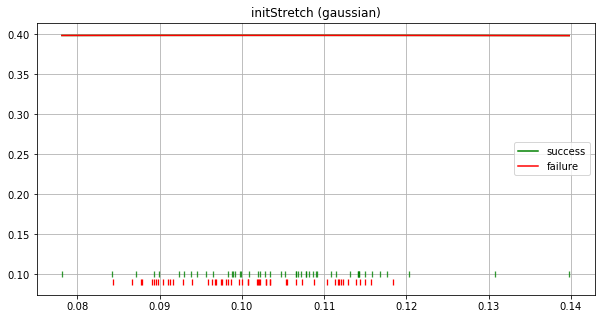

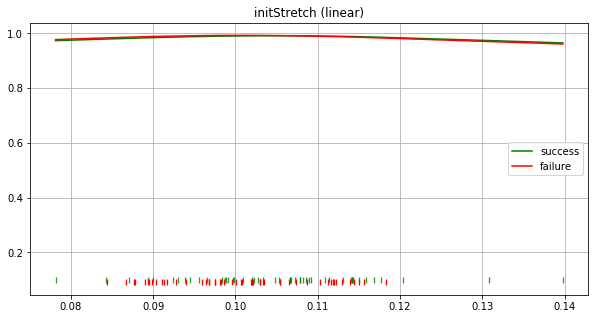

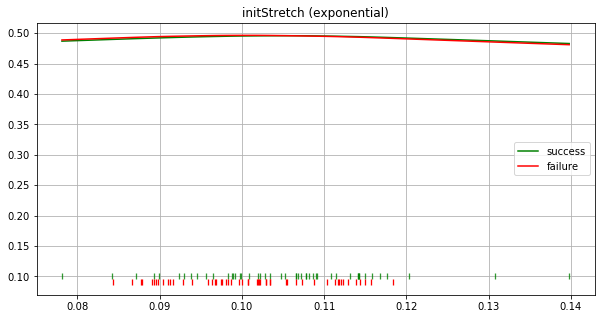

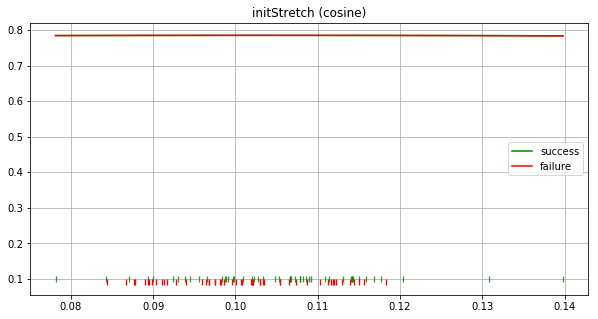

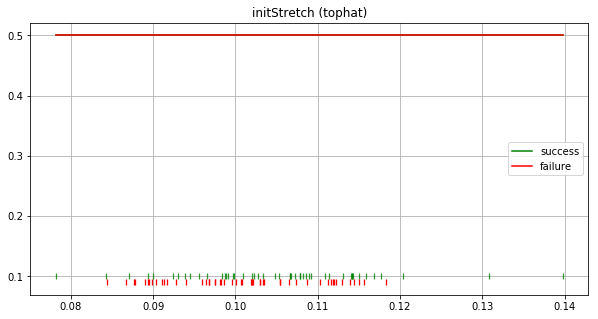

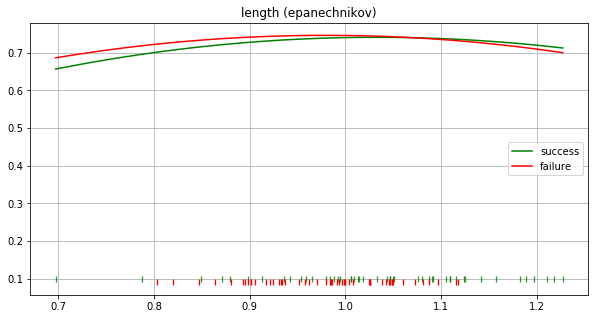

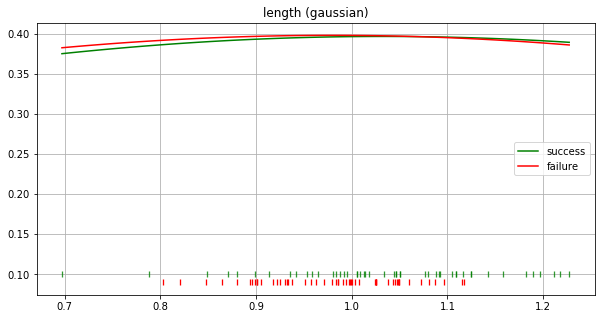

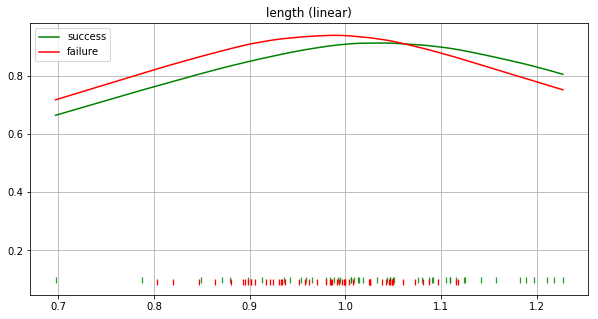

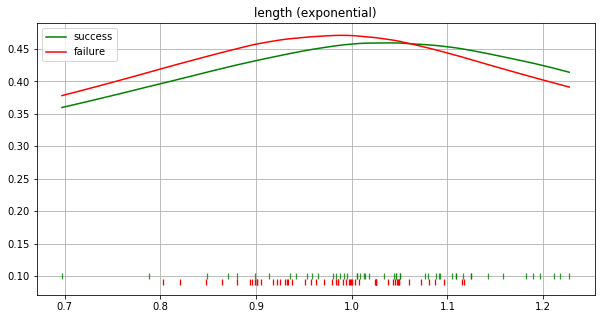

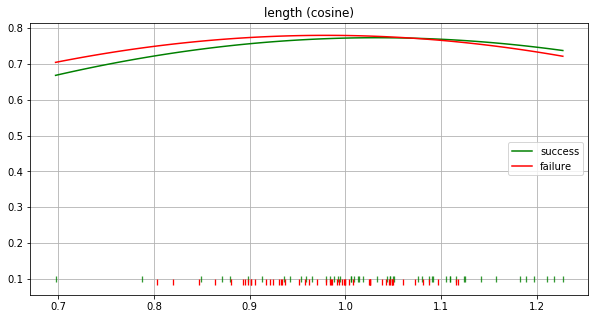

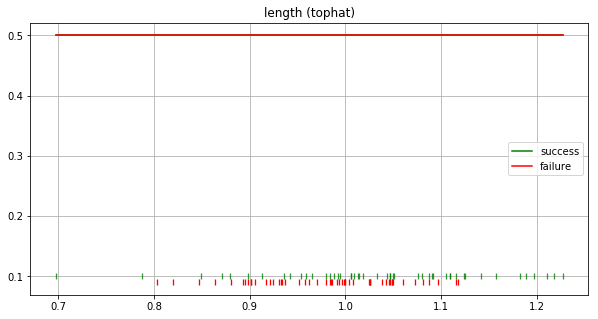

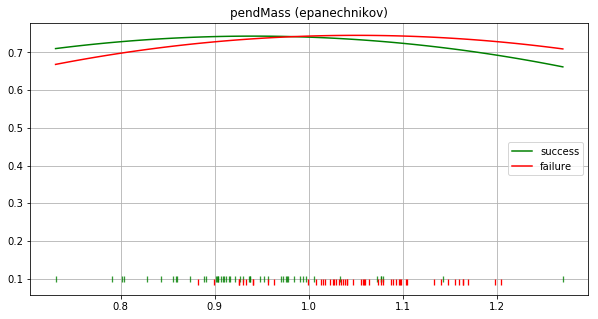

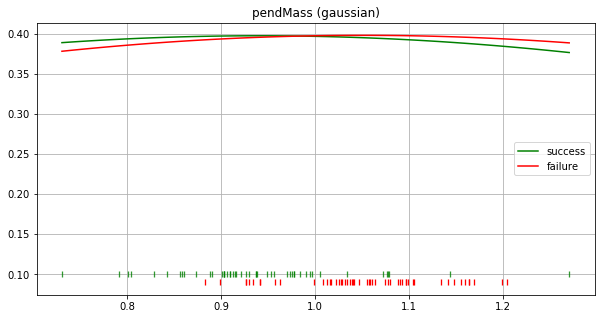

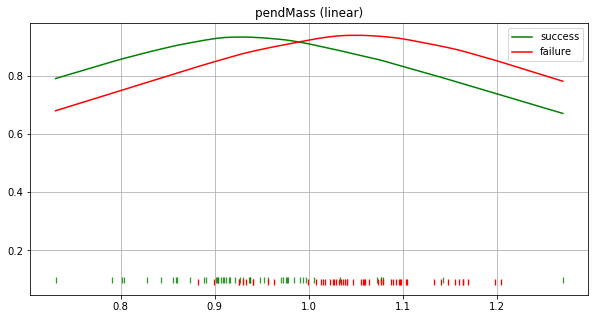

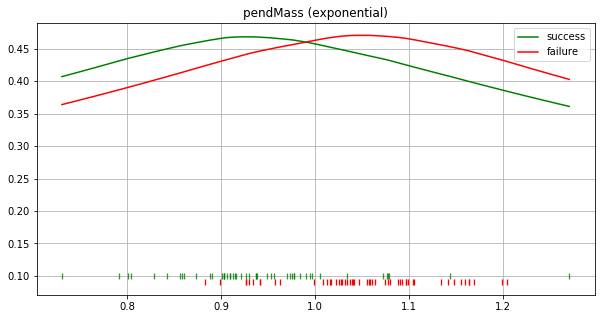

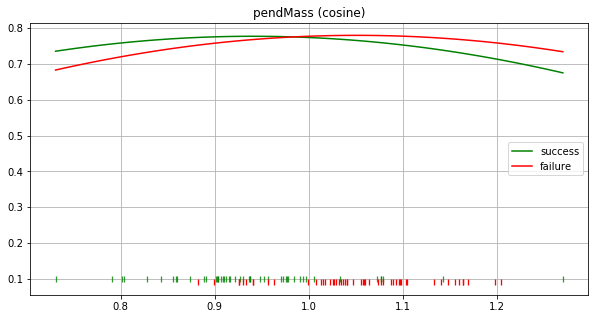

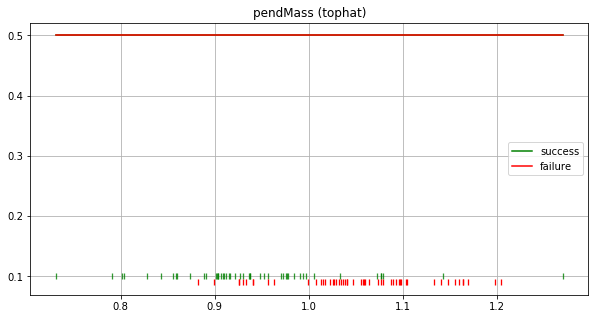

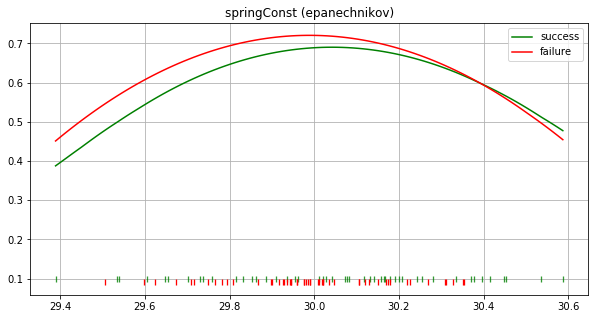

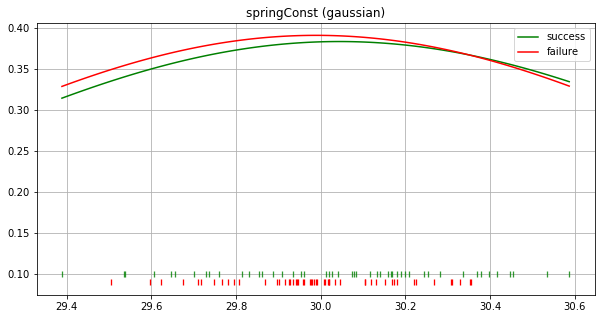

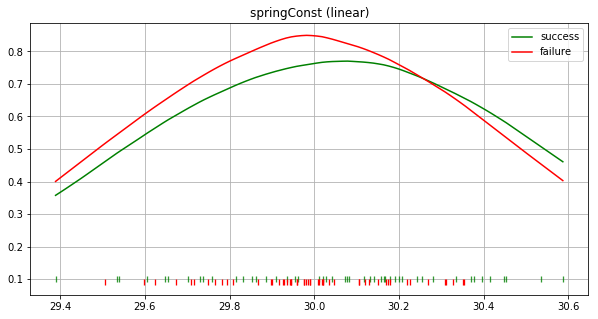

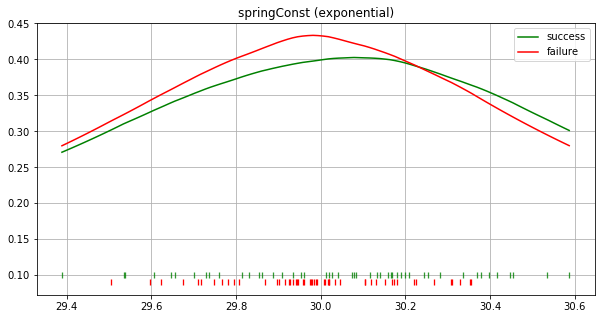

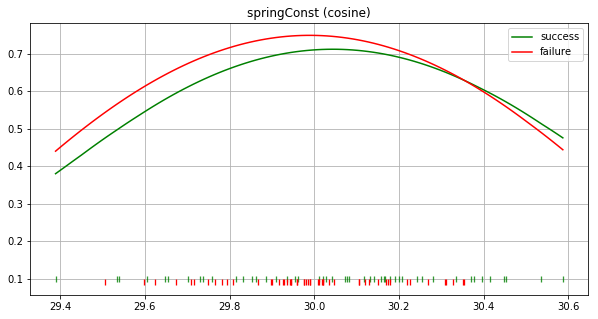

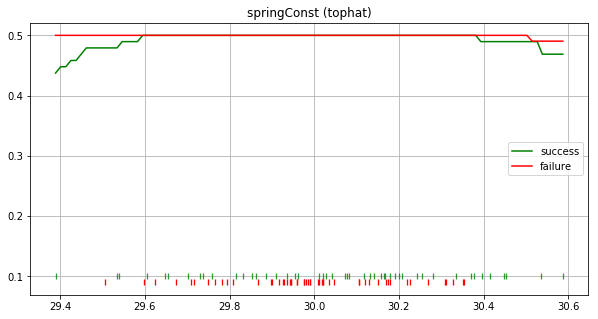

In [7]:
params = successData.columns.tolist()

for param in params:
    xSucc=successData[param]
    xFail=failureData[param]
    # Create the np.linspace array of x-values for plotting

    # Find min and max data points for the np.linspace array
    minx = min(xSucc)
    maxx = max(xSucc)

    if min(xFail) < minx:
        minx = min(xFail)

    if max(xFail) > maxx:
        maxx = max(xFail)

    # Create the array
    x = np.linspace(minx, maxx, 100) # array of 100 x-values for plotting the kde 
                                       # like [ minGrav, ...., maxGrav ] with length of 100
        
    # This is more so you can see the differences, we will just let the computer optimize this automatically, though,
    # along with the bandwidth. (Next cell)
    for kernel in ['epanechnikov','gaussian','linear','exponential','cosine','tophat']:
    
        # Fit a kernel density model to our data: one for our successes, ones for our failures
        kdeSuccess = KernelDensity( kernel=kernel ).fit( xSucc.values.reshape(-1,1) ) 
                                                    # Must reshape the gravSuccess to send 2D array
                                                    # .reshape(-1,1)  makes it [ [gravS1], [gravS2], ...]
                                                    # We do it this way because it is a single sample of the successes
                                                    # The kde.fit() function wants a 2D array with each 'row' being 
                                                    # an independent variable, or x-value, and we only have one here, the gravity
    
        kdeFailure = KernelDensity( kernel=kernel ).fit( xFail.values.reshape(-1,1) )
    
        # 'Score' a 'sample', or feed the kernel density a range of values and have it return the pdf
        scoreSuccess = kdeSuccess.score_samples(x.reshape(-1,1)) # score_samples is used to return the log density (somehow this is best)
                                                # this means that it returns the natural log of the density 
                                                # we will convert it back to regular density with "np.exp(scores)" for plotting
                                                # np.exp(scores) function gives us a list of e^(score) 
                                                # so it will essentially give us the value itself
                                                # since e^(ln x)=x
                        
        scoreFailure = kdeFailure.score_samples(x.reshape(-1,1))

        # Plot kde's
        plt.figure(figsize=(10,5))
        plt.plot(x, np.exp(scoreSuccess), color='green', label='success')
        plt.plot(x, np.exp(scoreFailure), color='red', label='failure')

        # Plot the individual successes and failures along the bottom for visual comparison to the kde distribution
        plt.plot(xSucc, np.full_like(xSucc, 0.1), '|k', color='green', markeredgewidth=1.3, alpha=0.8)
        plt.plot(xFail, np.full_like(xFail, 0.09), '|k', color='red', markeredgewidth=1.3)

        
        plt.title('%s (%s)'%(param, kernel))
        plt.legend( loc='best' )
        plt.grid()
        plt.show()        

### Plot the Kernel Densities (using each kernel type with default bandwidths=1.0 (very large) )

In [ ]:
# This is more so you can see the differences, we will just let the computer optimize this automatically, though,
# along with the bandwidth. (Next cell)
for kernel in ['epanechnikov','gaussian','linear','exponential','cosine','tophat']:
    
    # Fit a kernel density model to our data: one for our successes, ones for our failures
    kdeSuccess = KernelDensity( kernel=kernel ).fit( xSucc.reshape(-1,1) ) 
                                                    # Must reshape the gravSuccess to send 2D array
                                                    # .reshape(-1,1)  makes it [ [gravS1], [gravS2], ...]
                                                    # We do it this way because it is a single sample of the successes
                                                    # The kde.fit() function wants a 2D array with each 'row' being 
                                                    # an independent variable, or x-value, and we only have one here, the gravity
    
    kdeFailure = KernelDensity( kernel=kernel ).fit( xFail.reshape(-1,1) )
    
    # 'Score' a 'sample', or feed the kernel density a range of values and have it return the pdf
    scoreSuccess = kdeSuccess.score_samples(x.reshape(-1,1)) # score_samples is used to return the log density (somehow this is best)
                                                # this means that it returns the natural log of the density 
                                                # we will convert it back to regular density with "np.exp(scores)" for plotting
                                                # np.exp(scores) function gives us a list of e^(score) 
                                                # so it will essentially give us the value itself
                                                # since e^(ln x)=x
                        
    scoreFailure = kdeFailure.score_samples(x.reshape(-1,1))

    # Plot kde's
    plt.figure(figsize=(10,5))
    plt.plot(x, np.exp(scoreSuccess), color='green', label='success')
    plt.plot(x, np.exp(scoreFailure), color='red', label='failure')

    # Plot the individual successes and failures along the bottom for visual comparison to the kde distribution
    plt.plot(xSucc, np.full_like(xSucc, 0.1), '|k', color='green', markeredgewidth=1.3, alpha=0.8)
    plt.plot(xFail, np.full_like(xFail, 0.09), '|k', color='red', markeredgewidth=1.3)

    plt.title('%s (%s)'%(param, kernel))
    plt.legend( loc='best' )
    plt.grid()
    plt.show()